In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
amazon_data_training = pd.read_csv("Datasets/amazon_review_ID.shuf.lrn.csv")
amazon_data_training.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,11.798667,7.474667,6.648000,6.481333,6.122667,4.580000,4.002667,3.602667,2.898667,...,0.202667,0.222667,0.190667,0.201333,0.201333,0.208000,0.210667,0.213333,0.205333,0.200000
std,216.65064,5.689636,3.611844,3.236365,3.945767,3.332631,2.812498,4.037209,2.357726,2.093380,...,0.538497,0.645219,0.489863,0.616418,0.509717,0.470139,0.504605,0.511375,0.465611,0.529503
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,374.50000,11.000000,7.000000,6.000000,6.000000,6.000000,4.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,561.75000,15.000000,10.000000,8.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,749.00000,30.000000,21.000000,18.000000,25.000000,24.000000,14.000000,21.000000,14.000000,13.000000,...,4.000000,6.000000,4.000000,8.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000


In [3]:
amazon_data_training.isna().any().any()

False

In [6]:
headers=list(amazon_data_training)
headers_vector=headers[1:10001]
s0 = np.sum(amazon_data_training.iloc[:,1:10001],axis=0)
mask0 = np.argsort(s0)[::-1]
type(headers_vector)
headers_sort=np.array(headers_vector)[mask0]
s1 = np.mean(amazon_data_training.iloc[:,1:10001],axis=0)
amazon_data_training[headers_sort].iloc[:,0:10000].describe()



,V6567,V6568,V6569,V6570,V6571,V6572,V6573,V6574,V6575,V6576,...,V6607,V6605,V6608,V6609,V6611,V6612,V6610,V6614,V6613,V6615
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000
mean,250.026667,86.350667,73.136000,67.157333,56.144000,48.729333,41.428000,33.069333,32.125333,31.926667,...,10.466667,10.465333,10.170667,9.933333,9.848000,9.670667,9.578667,9.486667,9.34400,9.280000
std,65.571814,26.068636,22.481208,20.680913,16.934826,15.798297,13.437866,11.327766,11.951963,11.171139,...,4.900705,4.774291,5.299590,5.724268,5.691756,5.247373,4.711554,4.333458,4.54869,4.110815
min,49.000000,14.000000,12.000000,9.000000,8.000000,5.000000,5.000000,5.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,213.000000,69.000000,59.000000,55.000000,45.000000,38.000000,32.000000,25.000000,24.000000,24.000000,...,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
50%,254.500000,87.000000,74.000000,67.000000,56.000000,48.500000,41.000000,32.000000,31.000000,32.000000,...,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000
75%,295.000000,104.000000,88.000000,81.000000,67.000000,59.000000,51.000000,41.000000,39.000000,39.000000,...,14.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.00000,12.000000
max,410.000000,188.000000,132.000000,133.000000,108.000000,98.000000,80.000000,67.000000,87.000000,73.000000,...,29.000000,30.000000,37.000000,41.000000,39.000000,42.000000,26.000000,28.000000,29.00000,23.000000


In [8]:
print(s0.describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &              0 \\
\midrule
count &   10000.000000 \\
mean  &     308.859700 \\
std   &    2419.468303 \\
min   &       0.000000 \\
25\%   &       9.000000 \\
50\%   &      21.000000 \\
75\%   &     220.000000 \\
max   &  187520.000000 \\
\bottomrule
\end{tabular}



In [17]:
print(amazon_data_training[headers_sort].iloc[:,0].sort_values())

597     49
81      53
441     54
156     58
258     59
      ... 
618    388
407    389
705    395
241    408
406    410
Name: V6567, Length: 750, dtype: int64


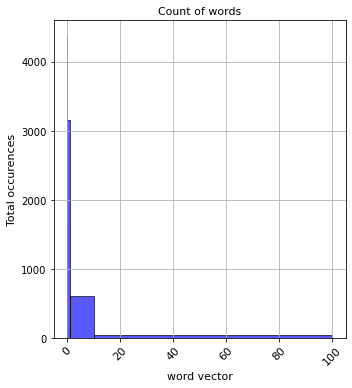

In [20]:
fig = plt.figure(figsize=(5,5.5))
plt.hist(s1 ,bins=[0, 0.0001, 0.001, 0.005, 0.01, 0.1, 1, 10, 100] , color='blue', edgecolor='k', alpha=0.65)
plt.title("Count of words",fontsize=11)
plt.ylabel("Total occurences",fontsize=11)
plt.xlabel("word vector",fontsize=11)
plt.xticks(rotation=45,fontsize=11)
plt.tight_layout()
plt.grid()
#plt.savefig("Hist_word_occurences.pdf")

In [6]:
#amazon_data_training[headers_sort].head()
#amazon_data_training["Class"].head()
dataset = pd.concat([amazon_data_training[headers_sort], amazon_data_training["Class"]], axis=1, join='inner')
#dataset=pd.concat(dataset)
print(dataset)

     V6567  V6568  V6569  V6570  V6571  V6572  V6573  V6574  V6575  V6576  \
0      311    106     91     99     94     55     56     52     33     35   
1      233     83     73     64     62     41     39     40     26     30   
2      223     90     71     71     63     50     29     32     62     35   
3      202     70     55     45     42     28     45     29     29     14   
4      233     78     82     74     54     50     40     15     34     30   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
745    271     78     69     78     52     66     44     29     56     42   
746    166     51     38     31     44     43     17     19      5     14   
747    184     65     48     57     38     49     28     29     40     21   
748    143     48     31     46     33     23     22     18     32     17   
749    198     61     61     54     72     44     31     25     21     15   

     ...  V3501  V3486  V3553  V2619  V6471  V2802  V2632  V6547  V3281  \


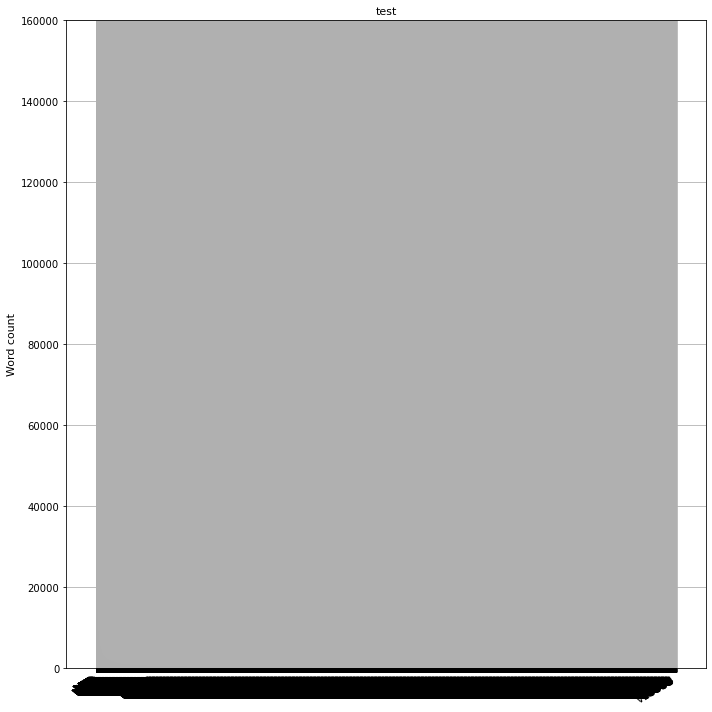

In [7]:
plt.figure(figsize=(10,10))
plt.bar(x=headers_vector, height=s0[mask0], color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=30,fontsize=11, ha="right")
plt.title("test",fontsize=11)
plt.ylabel("Word count",fontsize=11)
plt.ylim(0,1.6e5)
plt.grid()
plt.tight_layout()


In [10]:
amazon_data_training.iloc[:,20:300].describe()

,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299
count,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.130667,0.144000,0.150667,0.12800,0.145333,0.137333,0.132000,0.125333,0.148000,0.122667,...,0.080000,0.085333,0.088000,0.078667,0.098667,0.094667,0.076000,0.094667,0.098667,0.069333
std,0.381821,0.423678,0.462152,0.37922,0.392110,0.488663,0.403476,0.387072,0.465888,0.424098,...,0.325178,0.306883,0.310459,0.310817,0.328241,0.331438,0.279872,0.319125,0.377432,0.310894
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,5.000000,3.00000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,...,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000


In [101]:
amazon_data_test = pd.read_csv("./amazon_review_ID.shuf.tes.csv")
amazon_data_test.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1124.50000,11.760000,7.473333,6.801333,6.578667,6.260000,4.665333,3.764000,3.580000,2.957333,...,0.208000,0.188000,0.220000,0.208000,0.208000,0.201333,0.198667,0.196000,0.204000,0.209333
std,216.65064,5.609071,3.525790,3.496975,3.782974,3.403505,2.911924,4.065424,2.346688,2.127019,...,0.533963,0.571336,0.507224,0.659279,0.518743,0.493751,0.455494,0.479469,0.464764,0.556710
min,750.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,937.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1124.50000,11.000000,7.000000,6.000000,6.000000,6.000000,4.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1311.75000,15.000000,10.000000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1499.00000,32.000000,19.000000,20.000000,23.000000,21.000000,15.000000,20.000000,15.000000,12.000000,...,4.000000,6.000000,4.000000,6.000000,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000


In [82]:
amazon_data_training.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,22,11,7,11,7,2,0,3,1,...,0,0,0,0,0,0,0,0,0,Lee
1,1,11,6,6,3,7,4,5,3,3,...,0,0,0,0,0,0,0,0,0,Corn
2,2,11,2,2,5,5,2,6,3,5,...,1,0,0,0,1,0,0,0,0,Lee
3,3,13,8,8,4,2,2,7,6,2,...,0,0,0,0,0,1,0,0,0,Brody
4,4,8,6,6,6,6,4,1,5,0,...,0,0,1,0,0,0,0,0,1,Kolln


In [18]:
amazon_data_training.info()
reviews_count=amazon_data_training["Class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


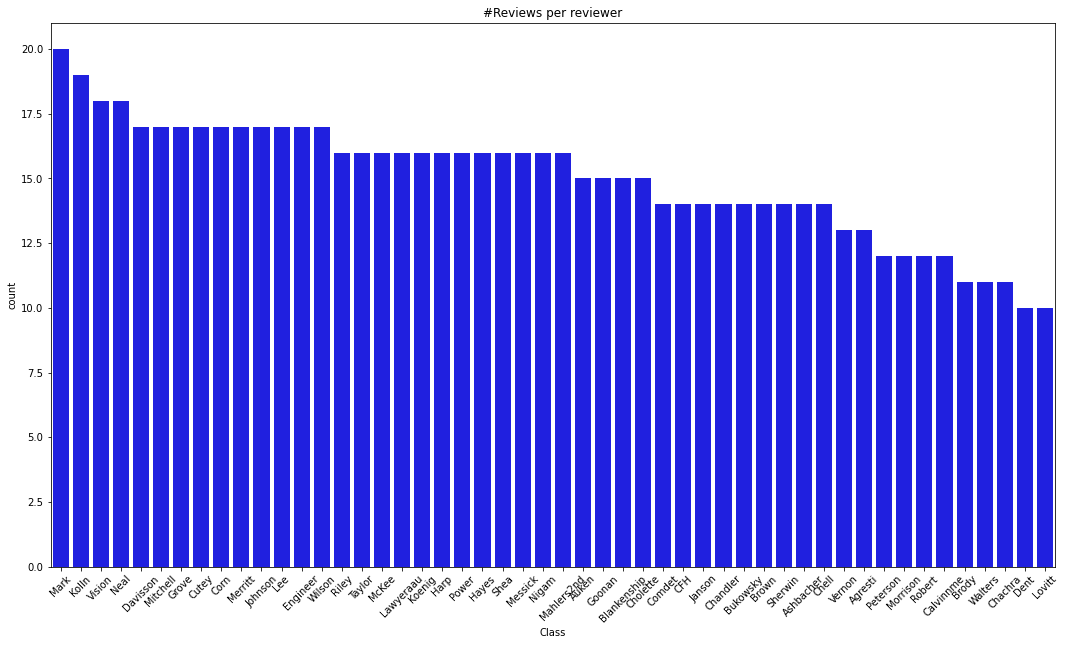

In [21]:
countplt, ax = plt.subplots(figsize = (18,10))

ax = sns.countplot(data=amazon_data_training, x='Class', color="blue", order = amazon_data_training['Class'].value_counts().index)
ax.set_title("#Reviews per reviewer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig("Instances per class.pdf")

In [105]:
X_test = np.array(amazon_data_test.iloc[:,0:10000])
X = np.array(amazon_data_training.iloc[:,0:10000])
#nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
#distances, indices = nbrs.kneighbors(X)
y = np.array(amazon_data_training["Class"])
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
KNeighborsClassifier(...)
print(neigh.predict(X_test))
print(neigh.predict_proba(X_test))



['Cutey' 'Cutey' 'Chell' 'Blankenship' 'Bukowsky' 'Ashbacher' 'Goonan'
 'Bukowsky' 'Chell' 'Mark' 'Bukowsky' 'Brody' 'Johnson' 'Auken' 'Cutey'
 'Wilson' 'Mark' 'Wilson' 'Auken' 'Mark' 'Bukowsky' 'Lee' 'Lee' 'Brody'
 'Auken' 'Cutey' 'Lee' 'Comdet' 'Messick' 'Auken' 'Ashbacher' 'Mitchell'
 'Mahlers2nd' 'Auken' 'Cholette' 'Wilson' 'Ashbacher' 'Chell' 'Cutey'
 'Engineer' 'Cutey' 'Cutey' 'Cutey' 'Cutey' 'Ashbacher' 'Chell' 'Chell'
 'Chell' 'Chell' 'Cutey' 'Brody' 'Cutey' 'Mahlers2nd' 'Brody' 'Mahlers2nd'
 'Brody' 'Chell' 'Cutey' 'Mahlers2nd' 'Chell' 'Chell' 'Cutey' 'Brody'
 'Lovitt' 'Cutey' 'Auken' 'Johnson' 'Auken' 'Lee' 'Cutey' 'Cutey'
 'Chachra' 'Brody' 'Ashbacher' 'Brody' 'Brody' 'Mahlers2nd' 'Auken'
 'Mahlers2nd' 'Mahlers2nd' 'Cutey' 'Engineer' 'Cutey' 'Chell' 'Chell'
 'Auken' 'Cutey' 'Auken' 'Engineer' 'Mahlers2nd' 'Chell' 'Auken' 'Cutey'
 'Engineer' 'Johnson' 'Cutey' 'Auken' 'Brody' 'Brody' 'Chell' 'Auken'
 'Brody' 'Mahlers2nd' 'Chachra' 'Cutey' 'Chachra' 'Johnson' 'Brody'
 'Brody' '

In [90]:
A=np.array(amazon_data_test.iloc[5:6,0:10000])
print(X)
print(np.array(amazon_data_training["Class"].iloc[5:6]))


[[  0  22  11 ...   0   0   0]
 [  1  11   6 ...   0   0   0]
 [  2  11   2 ...   0   0   0]
 ...
 [747  11   3 ...   0   0   0]
 [748   6   1 ...   0   0   0]
 [749   8   7 ...   0   0   0]]
['CFH']
